In [1]:
#pandas had dedicated libraries for Time series: datatime64[ns]
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn import metrics
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AR

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
data = pd.read_csv('seattleWeather_1948-2017.csv')

#print(data.head(10))
#print("\n Get data: ")
#print(data.at[0, 'TMAX'])
print('\n Data Types:')
print(data.dtypes)


 Data Types:
DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object


In [4]:
print("\n NA values:")
print(data[(data.RAIN != True) & (data.RAIN!=False)])
data = data.dropna(how='any', axis=0)


 NA values:
             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN


In [5]:
analysisData = data.copy()
analysisData['MONTH'] = pd.DatetimeIndex(analysisData['DATE']).month
analysisData['DAY'] = pd.DatetimeIndex(analysisData['DATE']).day

analysisData.corr()

,PRCP,TMAX,TMIN,MONTH,DAY
PRCP,1.000000,-0.226736,-0.064365,0.014918,-0.001339
TMAX,-0.226736,1.000000,0.860675,0.154972,0.001726
TMIN,-0.064365,0.860675,1.000000,0.222504,0.003190
MONTH,0.014918,0.154972,0.222504,1.000000,0.009639
DAY,-0.001339,0.001726,0.003190,0.009639,1.000000


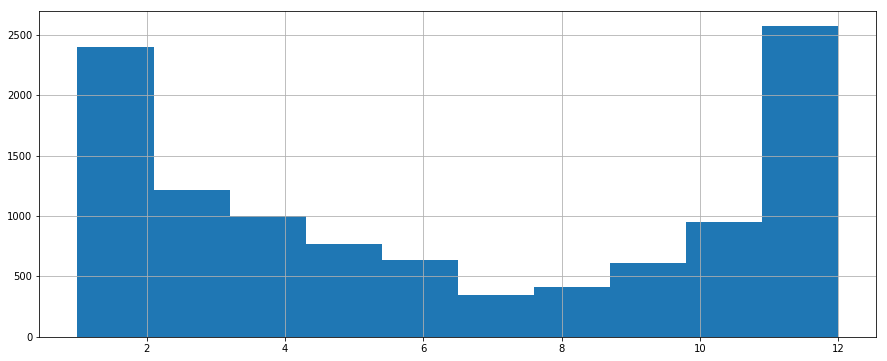

In [6]:
rain = analysisData[analysisData.RAIN == True].copy()
noRain = analysisData[analysisData.RAIN == False].copy()
rain['MONTH'].hist()

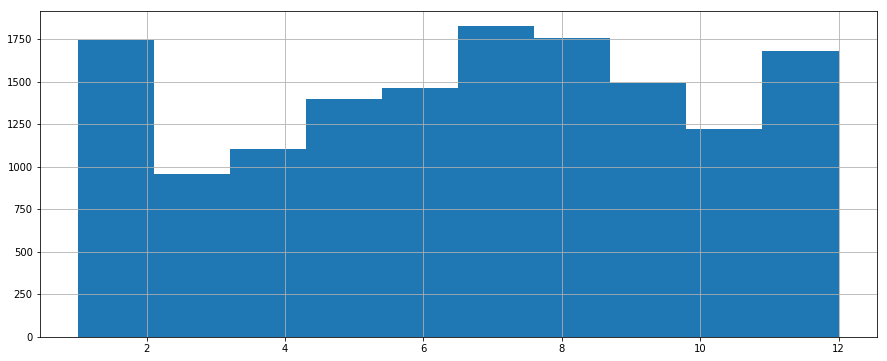

In [7]:
noRain['MONTH'].hist()

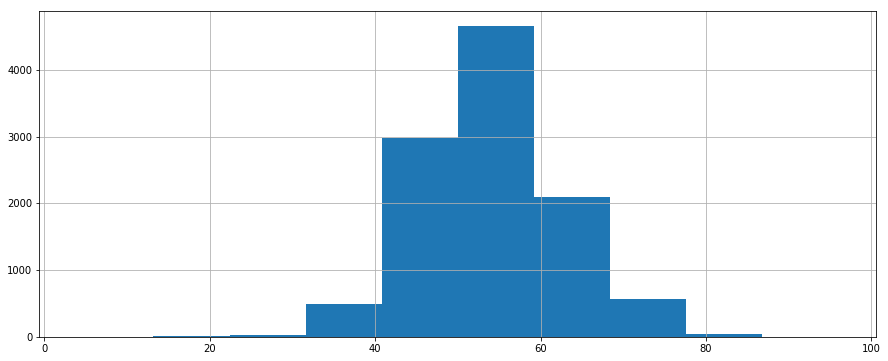

In [8]:
rain['TMAX'].hist()

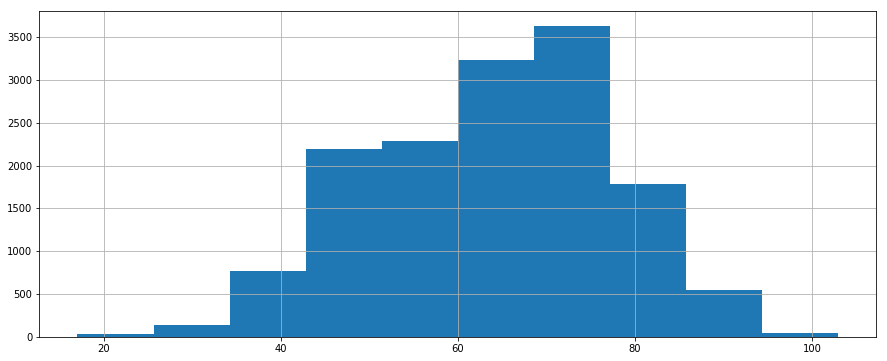

In [9]:
noRain['TMAX'].hist()

In [10]:
X = analysisData[['TMAX', 'TMIN', 'MONTH', 'DAY']].copy()
y = analysisData['RAIN'].copy()

scaler = StandardScaler()
Xscale = scaler.fit_transform(X)

C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
y = y.astype('bool')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)
XScaleTrain, XScaleTest, yScaleTrain, yScaleTest = train_test_split(Xscale, y, random_state = 0, test_size=0.3)

svc = SVC()
svc.fit(Xtrain, ytrain)
print(svc.score(Xtest, ytest))

svc.fit(XScaleTrain, yScaleTrain)
print(svc.score(XScaleTest, yScaleTest))

C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7512067840834964


C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7689497716894977


C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Liga\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 Total error:
0.09440236401689495

 Mean error:
1.231602922594846e-05


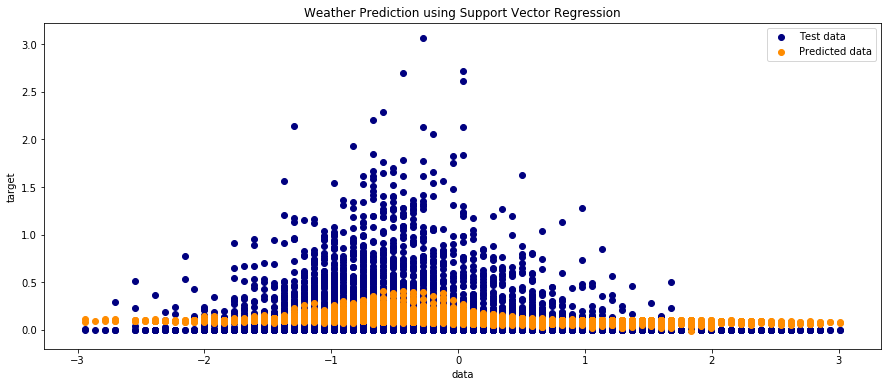

In [12]:
XRegr = analysisData[['TMAX', 'TMIN', 'MONTH', 'DAY']].copy()
yRegr = data['PRCP'].copy()

XScaleRegr = scaler.fit_transform(XRegr)
XTrainRegr, XTestRegr, yTrainRegr, yTestRegr = train_test_split(XScaleRegr, yRegr, test_size = 0.3)

svr = SVR()
svr.fit(XTrainRegr, yTrainRegr)
yPred = svr.predict(XTestRegr)
error = svr.score(XTestRegr, yTestRegr)

print("\n Total error:")
print(str(error))

print("\n Mean error:")
print(error/len(XTestRegr))

#print(str(XTestRegr.dtype))
#print(XTestRegr)
XPlot = XTestRegr[:, 0].copy()
#print(XPlot.shape)
#print(yTestRegr.shape)
plt.scatter(XPlot, yTestRegr, color = 'navy', label = 'Test data')
plt.scatter(XPlot, yPred, color = 'darkorange', label = 'Predicted data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Weather Prediction using Support Vector Regression')
plt.legend()
plt.show()

In [13]:
#analysisData = analysisData[['PRCP']].copy()
#n_relevant_features = 1
#n_features = analysisData.shape[1]
#n_tasks = analysisData.shape[0]
#n_samples = analysisData.shape[0]
#coef = np.zeros((n_tasks, n_features))

#for i in range(XTrainRegr.shape[0]):
    #for k in range(n_relevant_features):
        #coef[5:n_tasks-1, k] = analysisData.at[i, 'PRCP']
#for k in range(n_relevant_features):
    #coef[0, k] = analysisData.at[0, 'PRCP']
    #coef[1, k] = analysisData.at[0, 'PRCP']
    #coef[2, k] = analysisData.at[0, 'PRCP']
    #coef[3, k] = analysisData.at[0, 'PRCP']
    #coef[4, k] = analysisData.at[0, 'PRCP']

#print(analysisData.shape)
#print(coef.shape)
#X = analysisData
#y = np.dot(coef, X.T)

#coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, y).coef_

In [14]:
#plt.plot(analysisData, color = 'navy', label = 'Correct coef')
#plt.plot(coef_multi_task_lasso_, color = 'darkorange', label = 'Predicted coef')
#plt.xlabel('data')
#plt.ylabel('target')
#plt.title('Weather Prediction using Multi-Task Lasso')
#plt.legend()
#plt.show()

(25548, 1)
PRCP    float64
dtype: object
            PRCP
DATE            
1948-01-01  0.47
1948-01-02  0.59
1948-01-03  0.42
1948-01-04  0.31
1948-01-05  0.17


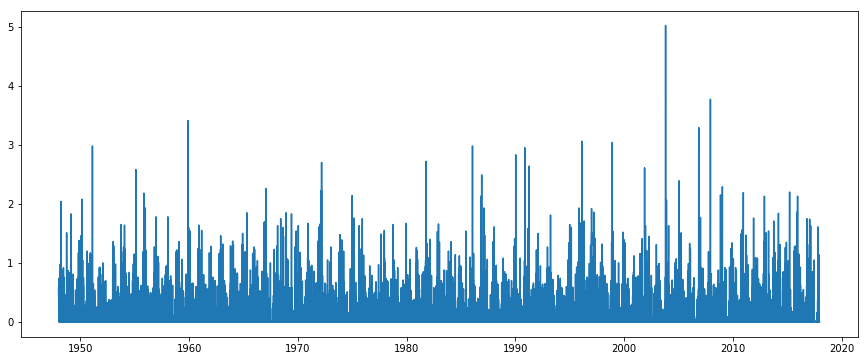

In [15]:
dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m-%d')
    
#parse_dates: the column which contains the date information
#index_col: the index in a time series system must be the column containing the date information
#date_parser: function that converts a string to a datetime variable

ts = pd.read_csv('seattleWeather_1948-2017.csv', parse_dates = ['DATE'], index_col = 'DATE', date_parser = dateparse)
ts = ts[['PRCP']].copy()
ts = ts.dropna(how='any', axis=0)
print(ts.shape)
print(ts.dtypes)
print(ts.head())

#ts.corr()
#ts.index
#These do not work
#ts['1948-01-02']
#from datetime import datetime
#ts[datetime(1950, 10, 10)]

#ts['1949']

plt.plot(ts)

In [16]:
#timeSeries = pd.Series.from_csv('seattleWeather_1948-2017.csv', header = 0)
#timeSeries = timeSeries[['DATE', 'PRCP']].copy()
timeSeries = ts.copy()
#pd.tools.plotting.lag_plot(timeSeries)
#pyplot.show()

In [17]:
values = pd.DataFrame(timeSeries.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
#print(result)

C:\Users\Liga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


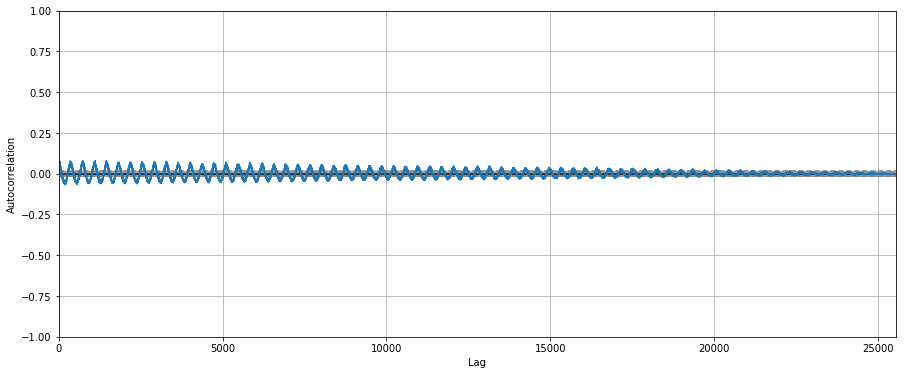

In [18]:
pd.tools.plotting.autocorrelation_plot(timeSeries)
pyplot.show()

In [19]:
#Autocorrelation model
X = timeSeries.values
train, test = X[1:len(X)-365], X[len(X)-365:]

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Lag: 48
Test MSE: 0.077


In [20]:
#Windows of 4 years
X = timeSeries.values

noWindows = X.shape[0] / 365 / 4
print('Number of considered windows: %d' % noWindows)
totalError = 0

for i in range(int(noWindows)):
    test_start_index = i*365*4
    test_end_index = test_start_index + 365*4
    train_start_index = test_end_index + 1
    train_end_index = train_start_index + 365
    if (i == noWindows - 1):
        train, test = X[:len(X)-365], X[len(X)-365:]
    else:
        train, test = X[test_start_index: test_end_index], X[train_start_index: train_end_index]
        
    print(train.shape)
    print(test.shape)
    model = AR(train)
    model_fit = model.fit()
    print('Lag: %s' % model_fit.k_ar)
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    totalError += error
    
avgError = totalError / noWindows
print('Average error: %.3f' % avgError)

Number of considered windows: 17
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.023
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.045
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.054
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.057
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.077
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.085
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.029
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.034
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.045
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.038
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.040
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.084
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.032
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.036
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.036
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.067
(1460, 1)
(365, 1)
Lag: 23
Test MSE: 0.060
Average error: 0.048


In [21]:
#Windows of several days
X = timeSeries.values
noExamples = X.shape[0]
windowSize = 40
#print('Window size: %d' % windowSize)
optimalNoWindows = 0
optimalLag = 0
optimalSize = 0
minWindowSize = 14
maxWindowSize = 36

for k in range(minWindowSize, maxWindowSize):
    size = 0
    lag = 0
    totalError = 0
    print('Window size %d' % k)
    for i in range(noExamples):
        test_start_index = i
        test_end_index = test_start_index + k
        train_start_index = test_end_index
        train_end_index = train_start_index + 1

        if (i < noExamples - k - 1):
            train, test = X[test_start_index: test_end_index], X[train_start_index: train_end_index]
            model = AR(train)
            model_fit = model.fit()
            lag += int(model_fit.k_ar)
            size += 1
            #print('Lag: %s' % model_fit.k_ar)
            predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
            error = mean_squared_error(test, predictions)
            #print('Test MSE: %.3f' % error)
            if error <= 10:
                totalError += error
        
    if k == minWindowSize:
        minimum = totalError
        optimalNoWindows = k
        optimalLag = lag
        optimalSize = size
    else:
        if totalError < minimum:
            minimum = totalError
            optimalNoWindows = k
            optimalLag = lag
            optimalSize = size

Window size 14
Window size 15
Window size 16
Window size 17
Window size 18
Window size 19
Window size 20
Window size 21
Window size 22
Window size 23
Window size 24
Window size 25
Window size 26
Window size 27
Window size 28
Window size 29
Window size 30
Window size 31
Window size 32
Window size 33
Window size 34
Window size 35


In [22]:
lag = lag / size
avgError = minimum / size
print('Window size %d' % optimalNoWindows)
print('Average error: %.3f' % avgError)
print('Considered windows: %d' % size)
print('Average lag: %d' % lag) 

Window size 35
Average error: 0.138
Considered windows: 25512
Average lag: 9
